In [1]:
%matplotlib notebook
!git pull
import os;os.environ['LAMBDA_PARQUET_TICK_DB']=rf'X:\lambda_data'

Already up to date.


In [2]:
from notebooks.lambda_imports import *
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()
# plot_with_dark_style()

PROJECT_PATH=E:\javif\Coding\Python\market_making_fw\python_lambda
BACKTEST_OUTPUT_PATH(LAMBDA_OUTPUT_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\output
BACKTEST_TEMP_PATH(LAMBDA_TEMP_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\temp
BACKTEST_JAR_PATH(LAMBDA_JAR_PATH)=E:\javif\Coding\Python\market_making_fw\java\executables\Backtest\target\Backtest.jar
log_path(LAMBDA_LOGS_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\logs
PARQUET_PATH_DB(LAMBDA_PARQUET_TICK_DB)=X:\lambda_data


In [3]:
DEBUG=False

In [4]:
session_name='AvellanedaDQNNotebook'
# load_notebook_session(session_name)

# Clean before

In [5]:
output_path='E:\javif\Coding\Python\market_making_fw\python_lambda\output'
from os import listdir
from os.path import isfile, join
onlyfiles = [join(output_path, f) for f in listdir(output_path) if isfile(join(output_path, f))]

for file in onlyfiles:
    os.remove(file)

# Properties

## Algorithm

In [6]:
#from feature importance
stateColumnsFilter=['ask_price_0',
 'ask_price_3',
 'ask_price_4',
 'ask_price_7',
 'ask_price_8',
 'ask_qty_0',
 'ask_qty_1',
 'ask_qty_2',
 'ask_qty_4',
 'bid_price_0',
 'bid_price_3',
 'bid_price_4',
 'bid_price_7',
 'bid_price_8',
 'bid_qty_0',
 'bid_qty_1',
 'bid_qty_4',
 'bid_qty_9',
 'close_0',
 'high_0',
 'low_0',
 'microprice_0',
 'spread_0',
 'spread_3',
 'spread_4',
 'spread_7',
 'spread_8']
# stateColumnsFilter=[]
len(stateColumnsFilter)

0

In [7]:
parameters_default = {
    # Q
    "skewPricePctAction": [0.,0.01,0.05,-0.01,-0.05],
    "riskAversionAction": [0.01,0.05,.1],
    "windowsTickAction": [8],
    
    "minPrivateState": (-1),
    "maxPrivateState": (-1),
    "numberDecimalsPrivateState":(3),
    "horizonTicksPrivateState": (5),
    
    "minMarketState": (-1),
    "maxMarketState": (-1),
    "numberDecimalsMarketState": (7),
    "horizonTicksMarketState": (10),
    
    "horizonMinMsTick": (0),
    
    "minCandleState": (-1),
    "maxCandleState": (-1),
    "numberDecimalsCandleState": (3),
    "horizonCandlesState": (2),
    
    "scoreEnum": ScoreEnum.asymmetric_dampened_pnl,
    "timeHorizonSeconds": (5),
    "epsilon": (0.2),
    "discountFactor": 0.95,
    "learningRate": 0.25,
    # Avellaneda default
    "risk_aversion": (0.9),
    "position_multiplier": (100),
    "window_tick": (10),
    "minutes_change_k": (10),
    "quantity": (0.0001),
    "k_default": (0.00769),
    "spread_multiplier": (5.0),
    "first_hour": (7),
    "last_hour": (19),
    #DQN
    "maxBatchSize": 10000,
    "trainingPredictIterationPeriod": -1,  # train only at the end,offline
    "trainingTargetIterationPeriod": -1,  # train at the end,offline
    "epoch": 2000,
    "stateColumnsFilter": stateColumnsFilter,
    "l1":0.,
    "l2":0.,
    
}
#for optimization
parameters_min={
    "risk_aversion": (0.1),
    "k_default": (0.001),
    "window_tick": (5)
}
parameters_max={
    "risk_aversion": (0.9),
    "k_default": (0.01),
    "window_tick": (25)
}


algorithm_info='avellaneda_stoikov_dqn'
algorithm = AvellanedaDQN(algorithm_info=algorithm_info,parameters=parameters_default)

## Backtest

In [8]:
instrument_pk='btcusdt_binance'

start_date_pt=datetime.datetime(year=2020, day=8, month=12,hour=9)
end_date_pt=datetime.datetime(year=2020, day=8, month=12,hour=11)

start_date_train=end_date_pt+datetime.timedelta(hours=1)
end_date_train=start_date_train+datetime.timedelta(hours=2)

start_date_test=end_date_train+datetime.timedelta(hours=1)
end_date_test=start_date_test+datetime.timedelta(hours=2)


## Genetic algorithm configuration

In [9]:
ga_configuration = GAConfiguration
if DEBUG:
    ga_configuration.population = 5
    ga_configuration_generations=3
    ga_configuration_simultaneous=5
else:
    ga_configuration.population = 15
    ga_configuration_generations=15
    ga_configuration_simultaneous=5

ga_configuration.decay=1/float(ga_configuration_generations)

# Parameter tuning

In [10]:
# best_param_dict, summary_df =algorithm.parameter_tuning(
#     instrument_pk=instrument_pk,
#     start_date=start_date_pt,
#     end_date=end_date_pt,
#     parameters_min=parameters_min,
#     parameters_max=parameters_max,
#     generations=ga_configuration_generations,
#     ga_configuration=ga_configuration,
# 	max_simultaneous=ga_configuration_simultaneous
# )

In [11]:
# summary_df

In [12]:
# summary_df['best_score_generation']=0
# for generation in range(ga_configuration_generations):
#     selected=summary_df['generation']<=generation
#     selected_single=summary_df['generation']==generation
#     best_score_generation=summary_df['score'][selected].max()
#     summary_df['best_score_generation'][selected_single]=best_score_generation
# summary_df.tail()


In [13]:
# best_by_generation=summary_df.groupby('generation').max('best_score_generation')
# plt.ioff()
# best_by_generation['best_score_generation'].plot()
# plt.show()

In [14]:
#from avelleaneda stoikov
best_param_dict={'risk_aversion': 0.01,
 'position_multiplier': 100.0,
 'window_tick': 20.936773236619324,
 'minutes_change_k': 10.0,
 'quantity': 0.0001,
 'k_default': 1.68688291488258,
 'spread_multiplier': 2.0,
 'first_hour': 7.0,
 'last_hour': 19.0}

In [15]:
algorithm.set_parameters(best_param_dict)

# Train

In [16]:

algorithm.algorithm_info=algorithm_info

In [17]:
iterations_train=ga_configuration_generations
algos_per_iteration=ga_configuration.population
train_simultaneous=ga_configuration_simultaneous

output_train_list=algorithm.train(
        instrument_pk=instrument_pk,
        start_date=start_date_train,
        end_date=end_date_train,
        iterations=iterations_train,
        algos_per_iteration=algos_per_iteration,
        simultaneous_algos=train_simultaneous,
    )

training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_0
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_1
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_2
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_3
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_4
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_5
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_6
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_7
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_8
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_9
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_10
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_11
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_12
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_13
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_14
cleaning experience on training  path E:\javif\Coding\Python\market_making_fw\py

AvellanedaDQN_avellaneda_stoikov_dqn_2 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_5
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_4 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_6
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_3 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_7
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_1 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_8
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_0 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_9
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_6 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_10
pwd=E

AvellanedaDQN_avellaneda_stoikov_dqn_8 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_12
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_7 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_13
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_9 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_14
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_10 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_13 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_12 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_11 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_14 finished with code 0
finished 15 backtests in 7 minutes
AvellanedaDQN_avellaneda_stoikov_dqn_0 with 6225 trades
AvellanedaDQN_avellaneda_stoikov_dqn_1 with 6194 trades
AvellanedaDQN_

AvellanedaDQN_avellaneda_stoikov_dqn_4 with 6174 trades
AvellanedaDQN_avellaneda_stoikov_dqn_5 with 6127 trades
AvellanedaDQN_avellaneda_stoikov_dqn_6 with 6169 trades
AvellanedaDQN_avellaneda_stoikov_dqn_7 with 6147 trades
AvellanedaDQN_avellaneda_stoikov_dqn_8 with 6199 trades
AvellanedaDQN_avellaneda_stoikov_dqn_9 with 6182 trades
AvellanedaDQN_avellaneda_stoikov_dqn_10 with 6225 trades
AvellanedaDQN_avellaneda_stoikov_dqn_11 with 6142 trades
AvellanedaDQN_avellaneda_stoikov_dqn_12 with 6168 trades
AvellanedaDQN_avellaneda_stoikov_dqn_13 with 6194 trades
AvellanedaDQN_avellaneda_stoikov_dqn_14 with 6173 trades
combining 15 memory_replay for 15 launchers from E:\javif\Coding\Python\market_making_fw\python_lambda\output
combining 284 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_7.csv
combining 281 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoik

combining 1903 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_6.csv
combining 6096 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_12.csv
combining 1929 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_4.csv
combining 6096 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_13.csv
combining 1912 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_8.csv
combining 6096 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_14.csv
combining 6096 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_3.csv
com

combining 1001 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_11.csv
combining 975 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_2.csv
saving 14938 rows in 15 files
launching 
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
 finished with code 0
finished 1 training in 0 minutes
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_0
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_1
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_2
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_3
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_4
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_5
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_6
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_7
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_8
tra

AvellanedaDQN_avellaneda_stoikov_dqn_4 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_5
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_1 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_6
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_0 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_7
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_2 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_8
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_3 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_9
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_5 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_10
pwd=E

AvellanedaDQN_avellaneda_stoikov_dqn_10 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_12 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_14 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_11 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_13 finished with code 0
finished 15 backtests in 4 minutes
AvellanedaDQN_avellaneda_stoikov_dqn_0 with 6197 trades
AvellanedaDQN_avellaneda_stoikov_dqn_1 with 6199 trades
AvellanedaDQN_avellaneda_stoikov_dqn_2 with 6150 trades
AvellanedaDQN_avellaneda_stoikov_dqn_3 with 6133 trades
AvellanedaDQN_avellaneda_stoikov_dqn_4 with 6225 trades
AvellanedaDQN_avellaneda_stoikov_dqn_5 with 6189 trades
AvellanedaDQN_avellaneda_stoikov_dqn_6 with 6160 trades
AvellanedaDQN_avellaneda_stoikov_dqn_7 with 6159 trades
AvellanedaDQN_avellaneda_stoikov_dqn_8 with 6178 trades
AvellanedaDQN_avellaneda_stoikov_dqn_9 with 6169 trades
AvellanedaDQN_avellaneda_stoikov_dqn_10 with 6131 trades
AvellanedaDQN_avellaneda_stoikov_dqn_11 wit

combining 999 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_5.csv
combining 998 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_0.csv
combining 997 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_6.csv
combining 1005 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_12.csv
combining 1004 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_4.csv
combining 1005 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_13.csv
combining 1001 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_8.csv
combini

combining 1003 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_9.csv
combining 990 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_10.csv
combining 1001 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_11.csv
combining 1003 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_2.csv
saving 15018 rows in 15 files
launching 
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
 finished with code 0
finished 1 training in 0 minutes
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_0
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_1
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_2
training on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_3
training on algorithm A

AvellanedaDQN_avellaneda_stoikov_dqn_1 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_5
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_2 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_6
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_3 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_7
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_0 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_8
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_4 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_9
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_6 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_10
pwd=E

AvellanedaDQN_avellaneda_stoikov_dqn_7 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_13
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_9 finished with code 0
launching AvellanedaDQN_avellaneda_stoikov_dqn_14
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_10 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_11 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_12 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_13 finished with code 0
AvellanedaDQN_avellaneda_stoikov_dqn_14 finished with code 0
finished 15 backtests in 2 minutes
AvellanedaDQN_avellaneda_stoikov_dqn_0 with 6152 trades
AvellanedaDQN_avellaneda_stoikov_dqn_1 with 6188 trades
AvellanedaDQN_avellaneda_stoikov_dqn_2 with 6160 trades
AvellanedaDQN_avellaneda_stoikov_dqn_3 with 6184 trades
AvellanedaDQN_avellaneda_stoikov_dqn_4 with 6168 trades
AvellanedaDQN_avellaneda

AvellanedaDQN_avellaneda_stoikov_dqn_13 with 6141 trades
AvellanedaDQN_avellaneda_stoikov_dqn_14 with 6131 trades
combining 15 memory_replay for 15 launchers from E:\javif\Coding\Python\market_making_fw\python_lambda\output
combining 1003 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_7.csv
combining 981 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_5.csv
combining 1002 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_0.csv
combining 1005 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_6.csv
combining 1004 rows from E:\javif\Coding\Python\market_making_fw\python_lambda\output\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_12.csv
combining 1001 rows from E:\javif\Coding\Python\market_making_fw\p

In [18]:
name_output=algorithm.NAME+'_'+algorithm.algorithm_info+'_0'
backtest_result_train_init=output_train_list[0][name_output]
backtest_result_train_init.tail()

,timestamp,date,verb,price,quantity,netPosition,avgOpenPrice,netInvestment,historicalRealizedPnl,historicalUnrealizedPnl,historicalTotalPnl,numberTrades,reward,skewPricePct,imbalance,riskAversion,ask,windowTick,bid_qty,ask_qty,bid
6201,1607432394778,2020-12-08T12:59:54.778,Buy,18726.975505,0.0001,-0.008498,18722.290356,177.745817,-0.131811,-0.039795,-0.171606,6209,-0.171638,-0.05,-0.641317,0.05,18726.97701,8.0,0.0001,0.0001,18726.976
6202,1607432396717,2020-12-08T12:59:56.717,Sell,18726.964515,0.0001,-0.008598,18722.344719,177.745817,-0.131811,-0.039740,-0.171551,6210,-0.171638,-0.05,-0.641317,0.05,18726.97701,8.0,0.0001,0.0001,18726.976
6203,1607432397941,2020-12-08T12:59:57.941,Buy,18726.965750,0.0001,-0.008498,18722.344719,177.745817,-0.132273,-0.039263,-0.171536,6211,-0.171638,-0.05,-0.641317,0.05,18726.97701,8.0,0.0001,0.0001,18726.976
6204,1607432398105,2020-12-08T12:59:58.105,Sell,18726.965010,0.0001,-0.008598,18722.398456,177.745817,-0.132273,-0.039263,-0.171536,6212,-0.171638,-0.05,-0.641317,0.05,18726.97701,8.0,0.0001,0.0001,18726.976
6205,1607432398446,2020-12-08T12:59:58.446,Buy,18726.964000,0.0001,-0.008498,18722.398456,177.745817,-0.132729,-0.038467,-0.171196,6213,-0.171638,-0.05,-0.641317,0.05,18726.97701,8.0,0.0001,0.0001,18726.976


plotting trade_results from 2020-12-08 12:00:07.309000 to 2020-12-08 13:59:58.446000


<IPython.core.display.Javascript object>


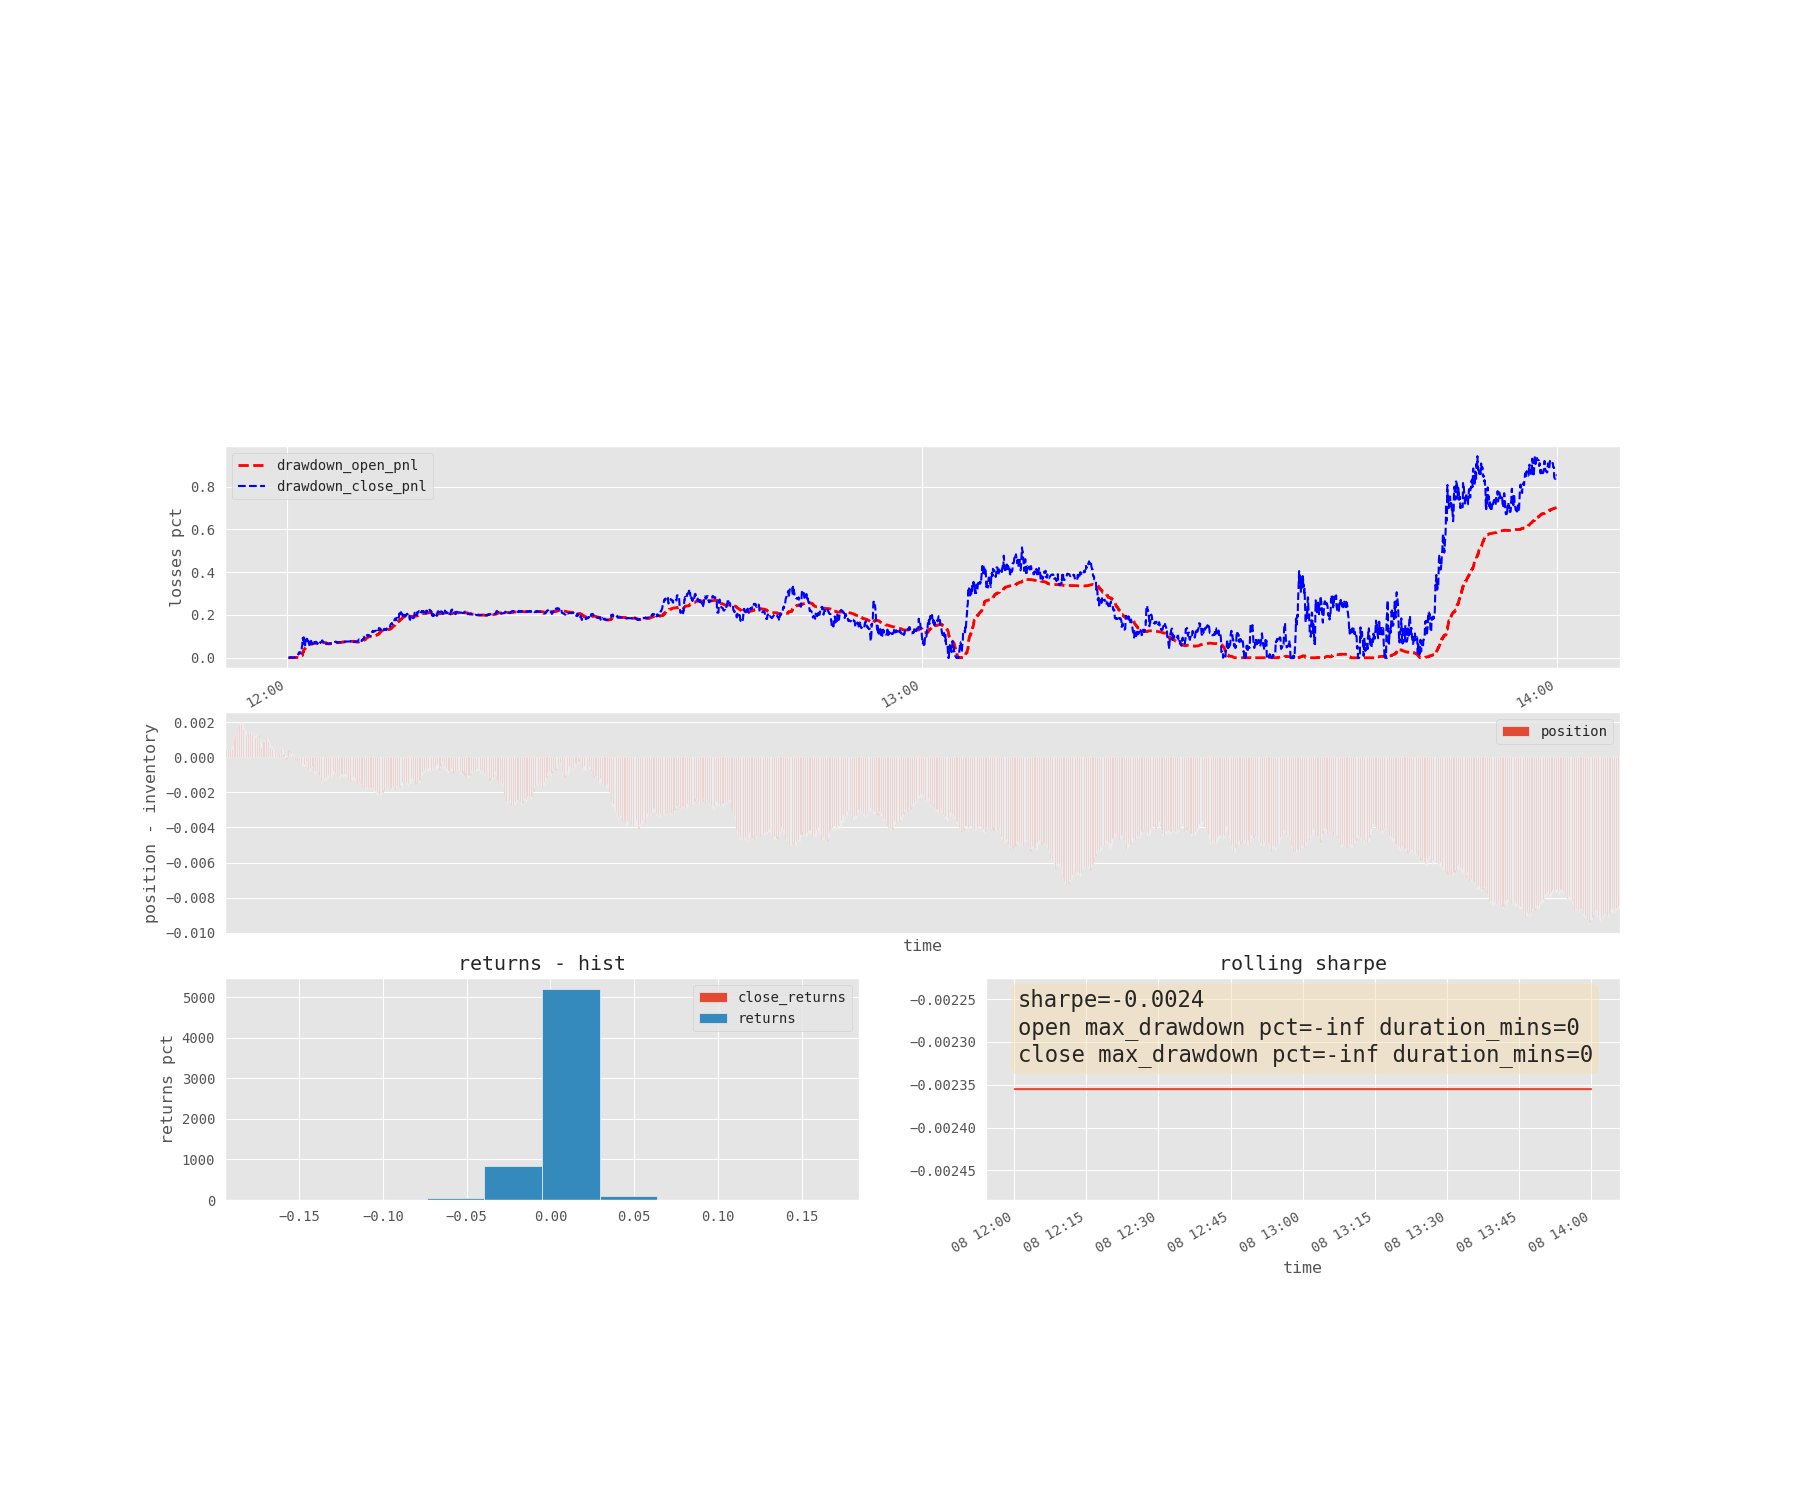

In [31]:
plot_1=algorithm.plot_trade_results(raw_trade_pnl_df=backtest_result_train_init)


plotting params from 0 to 6205


<IPython.core.display.Javascript object>


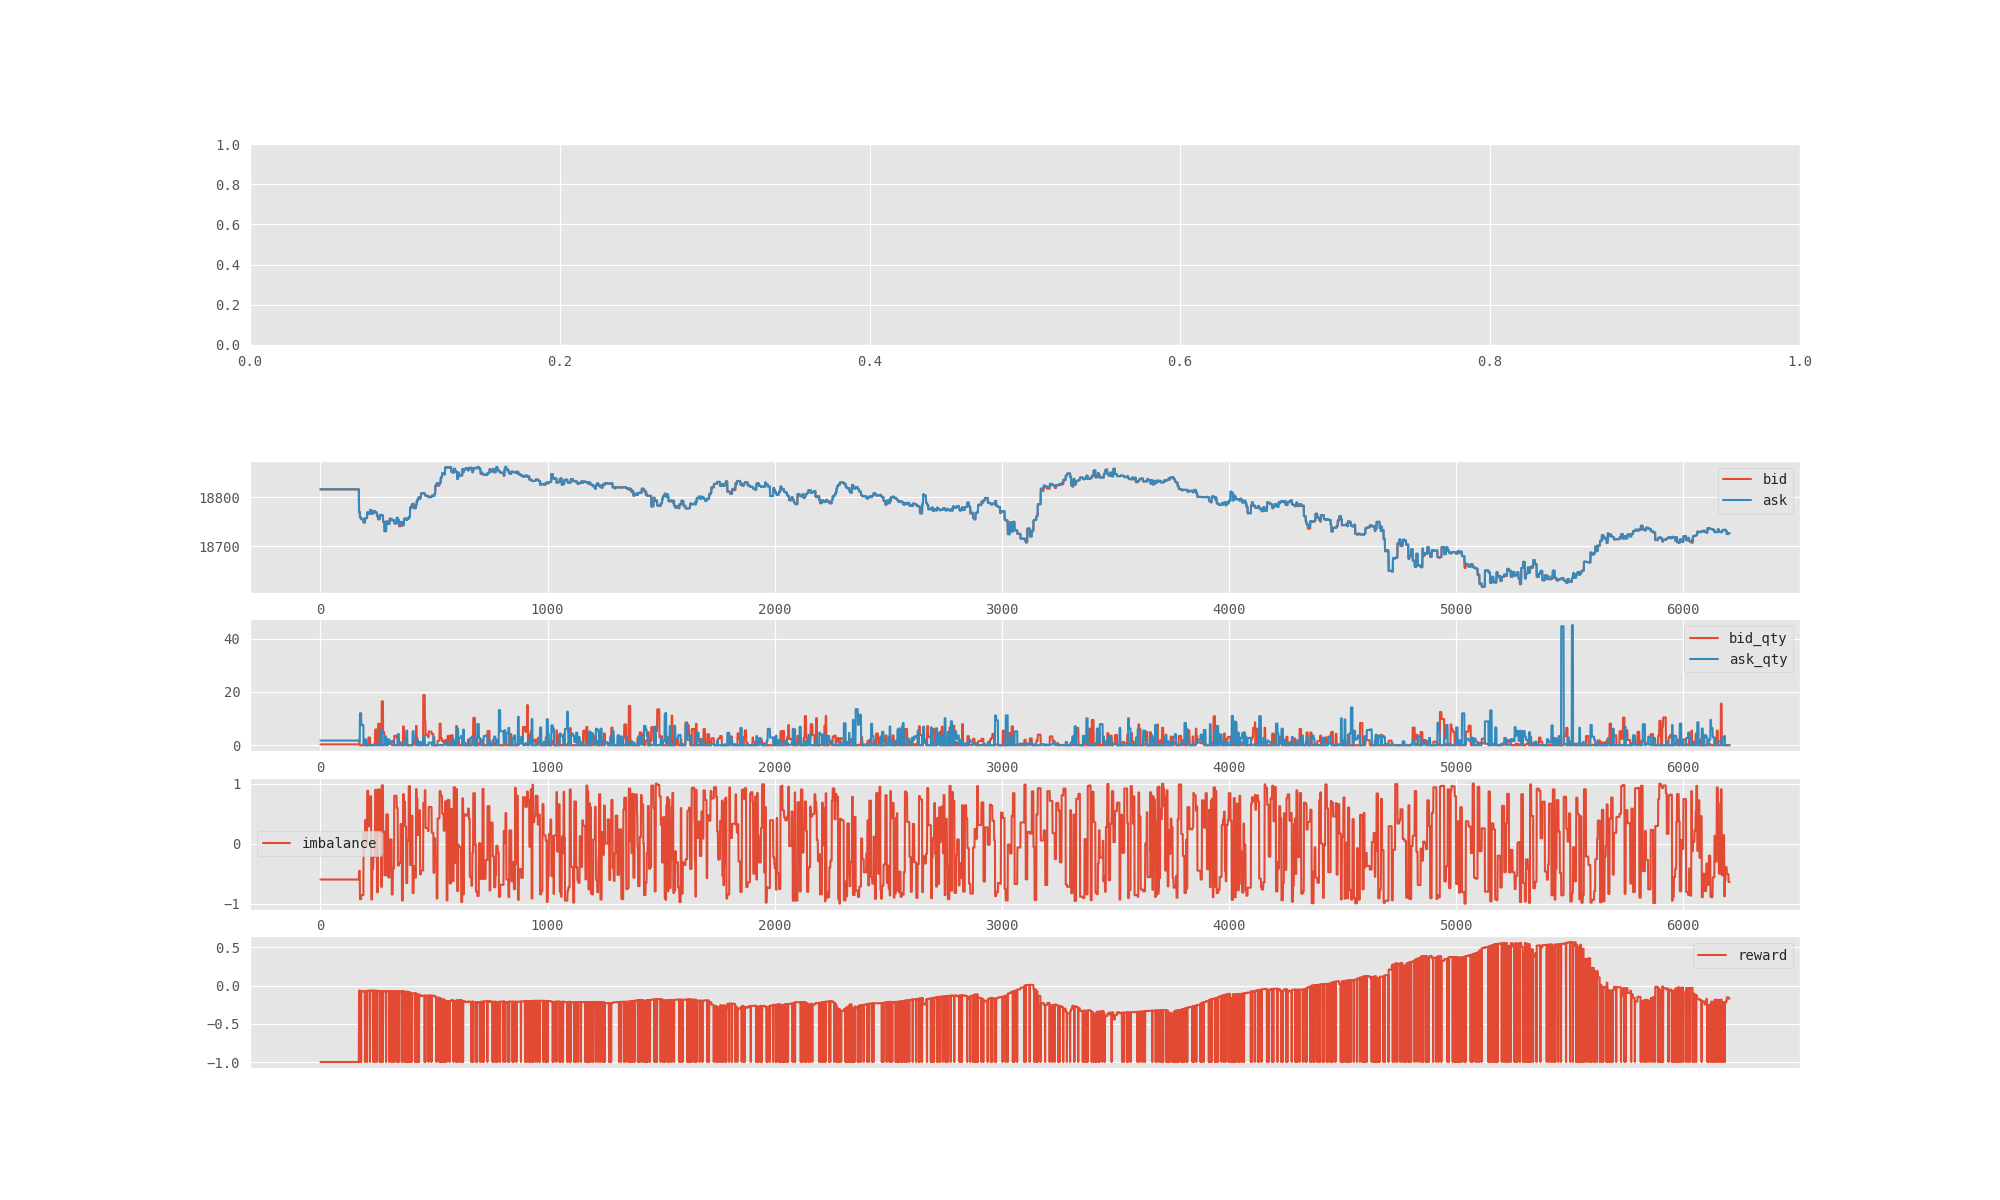

In [20]:
plot_2=algorithm.plot_params(raw_trade_pnl_df=backtest_result_train_init)

In [21]:

backtest_result_train=output_train_list[-1][name_output]
backtest_result_train.tail()

,timestamp,date,verb,price,quantity,netPosition,avgOpenPrice,netInvestment,historicalRealizedPnl,historicalUnrealizedPnl,historicalTotalPnl,numberTrades,reward,skewPricePct,imbalance,riskAversion,ask,windowTick,bid_qty,ask_qty,bid
6129,1607432394778,2020-12-08T12:59:54.778,Buy,18726.976985,0.0001,-0.007245,18723.621263,156.179352,-0.248768,-0.024291,-0.273059,6137,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.0001,0.0001,18726.97748
6130,1607432396717,2020-12-08T12:59:56.717,Sell,18726.964515,0.0001,-0.007345,18723.666780,156.179352,-0.248768,-0.024238,-0.273006,6138,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.0001,0.0001,18726.97748
6131,1607432397941,2020-12-08T12:59:57.941,Buy,18726.965750,0.0001,-0.007245,18723.666780,156.179352,-0.249098,-0.023896,-0.272993,6139,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.0001,0.0001,18726.97748
6132,1607432398105,2020-12-08T12:59:58.105,Sell,18726.965010,0.0001,-0.007345,18723.711684,156.179352,-0.249098,-0.023896,-0.272993,6140,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.0001,0.0001,18726.97748
6133,1607432398446,2020-12-08T12:59:58.446,Buy,18726.964000,0.0001,-0.007245,18723.711684,156.179352,-0.249423,-0.023280,-0.272704,6141,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.0001,0.0001,18726.97748


In [22]:
output_train_list[-1][name_output]

,timestamp,date,verb,price,quantity,netPosition,avgOpenPrice,netInvestment,historicalRealizedPnl,historicalUnrealizedPnl,historicalTotalPnl,numberTrades,reward,skewPricePct,imbalance,riskAversion,ask,windowTick,bid_qty,ask_qty,bid
0,1607425207309,2020-12-08T11:00:07.309,Buy,18804.866000,0.0001,0.000000,18804.866000,1.880487,0.000000,-0.000000e+00,0.000000e+00,2,-1.000000,0.00,-0.598677,0.10,18816.01000,8.0,0.304422,1.74219,18816.00000
1,1607425208826,2020-12-08T11:00:08.826,Buy,18802.004000,0.0001,0.000100,18802.004000,1.880487,0.000000,-1.000000e-07,-1.000000e-07,3,-1.000000,0.00,-0.598677,0.10,18816.01000,8.0,0.304422,1.74219,18816.00000
2,1607425212106,2020-12-08T11:00:12.106,Buy,18802.000625,0.0001,0.000200,18802.002313,1.880487,0.000000,-2.235000e-07,-2.235000e-07,4,-1.000000,0.00,-0.598677,0.10,18816.01000,8.0,0.304422,1.74219,18816.00000
3,1607425216104,2020-12-08T11:00:16.104,Buy,18802.000100,0.0001,0.000300,18802.001575,3.760400,0.000000,-6.259725e-04,-6.259725e-04,5,-1.000000,0.00,-0.598677,0.10,18816.01000,8.0,0.304422,1.74219,18816.00000
4,1607425218105,2020-12-08T11:00:18.105,Buy,18795.684000,0.0001,0.000400,18800.422181,5.640600,0.000000,-2.370872e-03,-2.370872e-03,6,-1.000000,0.00,-0.598677,0.10,18816.01000,8.0,0.304422,1.74219,18816.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,1607432394778,2020-12-08T12:59:54.778,Buy,18726.976985,0.0001,-0.007245,18723.621263,156.179352,-0.248768,-2.429058e-02,-2.730585e-01,6137,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.000100,0.00010,18726.97748
6130,1607432396717,2020-12-08T12:59:56.717,Sell,18726.964515,0.0001,-0.007345,18723.666780,156.179352,-0.248768,-2.423828e-02,-2.730062e-01,6138,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.000100,0.00010,18726.97748
6131,1607432397941,2020-12-08T12:59:57.941,Buy,18726.965750,0.0001,-0.007245,18723.666780,156.179352,-0.249098,-2.389560e-02,-2.729935e-01,6139,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.000100,0.00010,18726.97748
6132,1607432398105,2020-12-08T12:59:58.105,Sell,18726.965010,0.0001,-0.007345,18723.711684,156.179352,-0.249098,-2.389560e-02,-2.729935e-01,6140,-0.273084,-0.01,-0.641317,0.01,18726.97849,8.0,0.000100,0.00010,18726.97748


plotting trade_results from 2020-12-08 12:00:07.309000 to 2020-12-08 13:59:58.446000


<IPython.core.display.Javascript object>


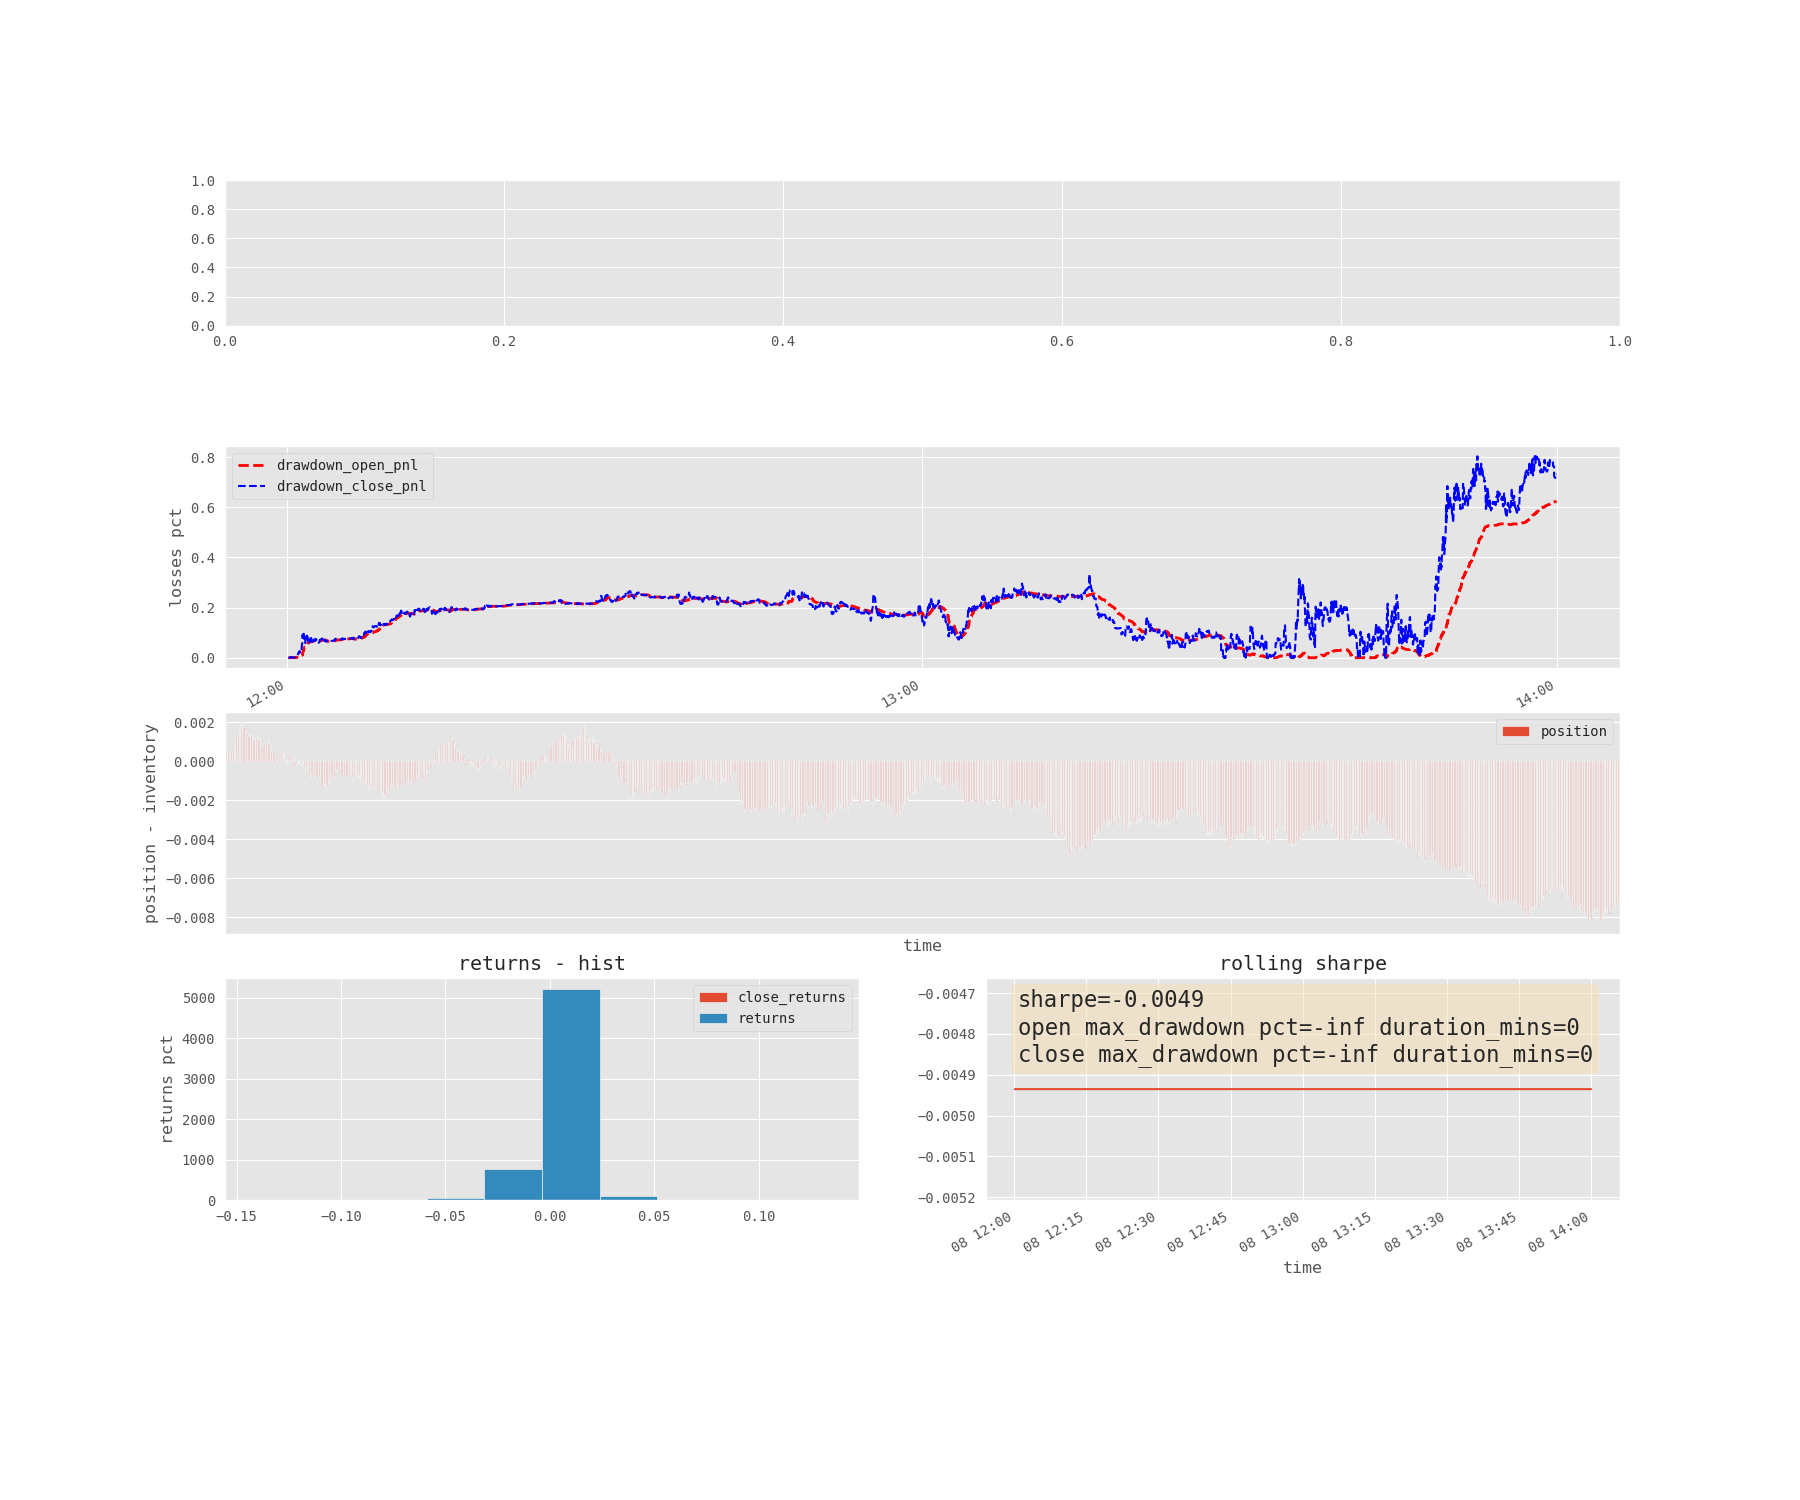

(<Figure size 1800x1500 with 4 Axes>,
                              timestamp  verb         price  quantity  \
 time                                                                   
 2020-12-08 12:00:07.309  1607425207309   Buy  18804.866000    0.0001   
 2020-12-08 12:00:08.826  1607425208826   Buy  18802.004000    0.0001   
 2020-12-08 12:00:12.106  1607425212106   Buy  18802.000625    0.0001   
 2020-12-08 12:00:16.104  1607425216104   Buy  18802.000100    0.0001   
 2020-12-08 12:00:18.105  1607425218105   Buy  18795.684000    0.0001   
 ...                                ...   ...           ...       ...   
 2020-12-08 13:59:54.778  1607432394778   Buy  18726.976985    0.0001   
 2020-12-08 13:59:56.717  1607432396717  Sell  18726.964515    0.0001   
 2020-12-08 13:59:57.941  1607432397941   Buy  18726.965750    0.0001   
 2020-12-08 13:59:58.105  1607432398105  Sell  18726.965010    0.0001   
 2020-12-08 13:59:58.446  1607432398446   Buy  18726.964000    0.0001   
 
           

In [23]:
plot_3=algorithm.plot_trade_results(raw_trade_pnl_df=backtest_result_train)

plotting params from 0 to 6133


<IPython.core.display.Javascript object>


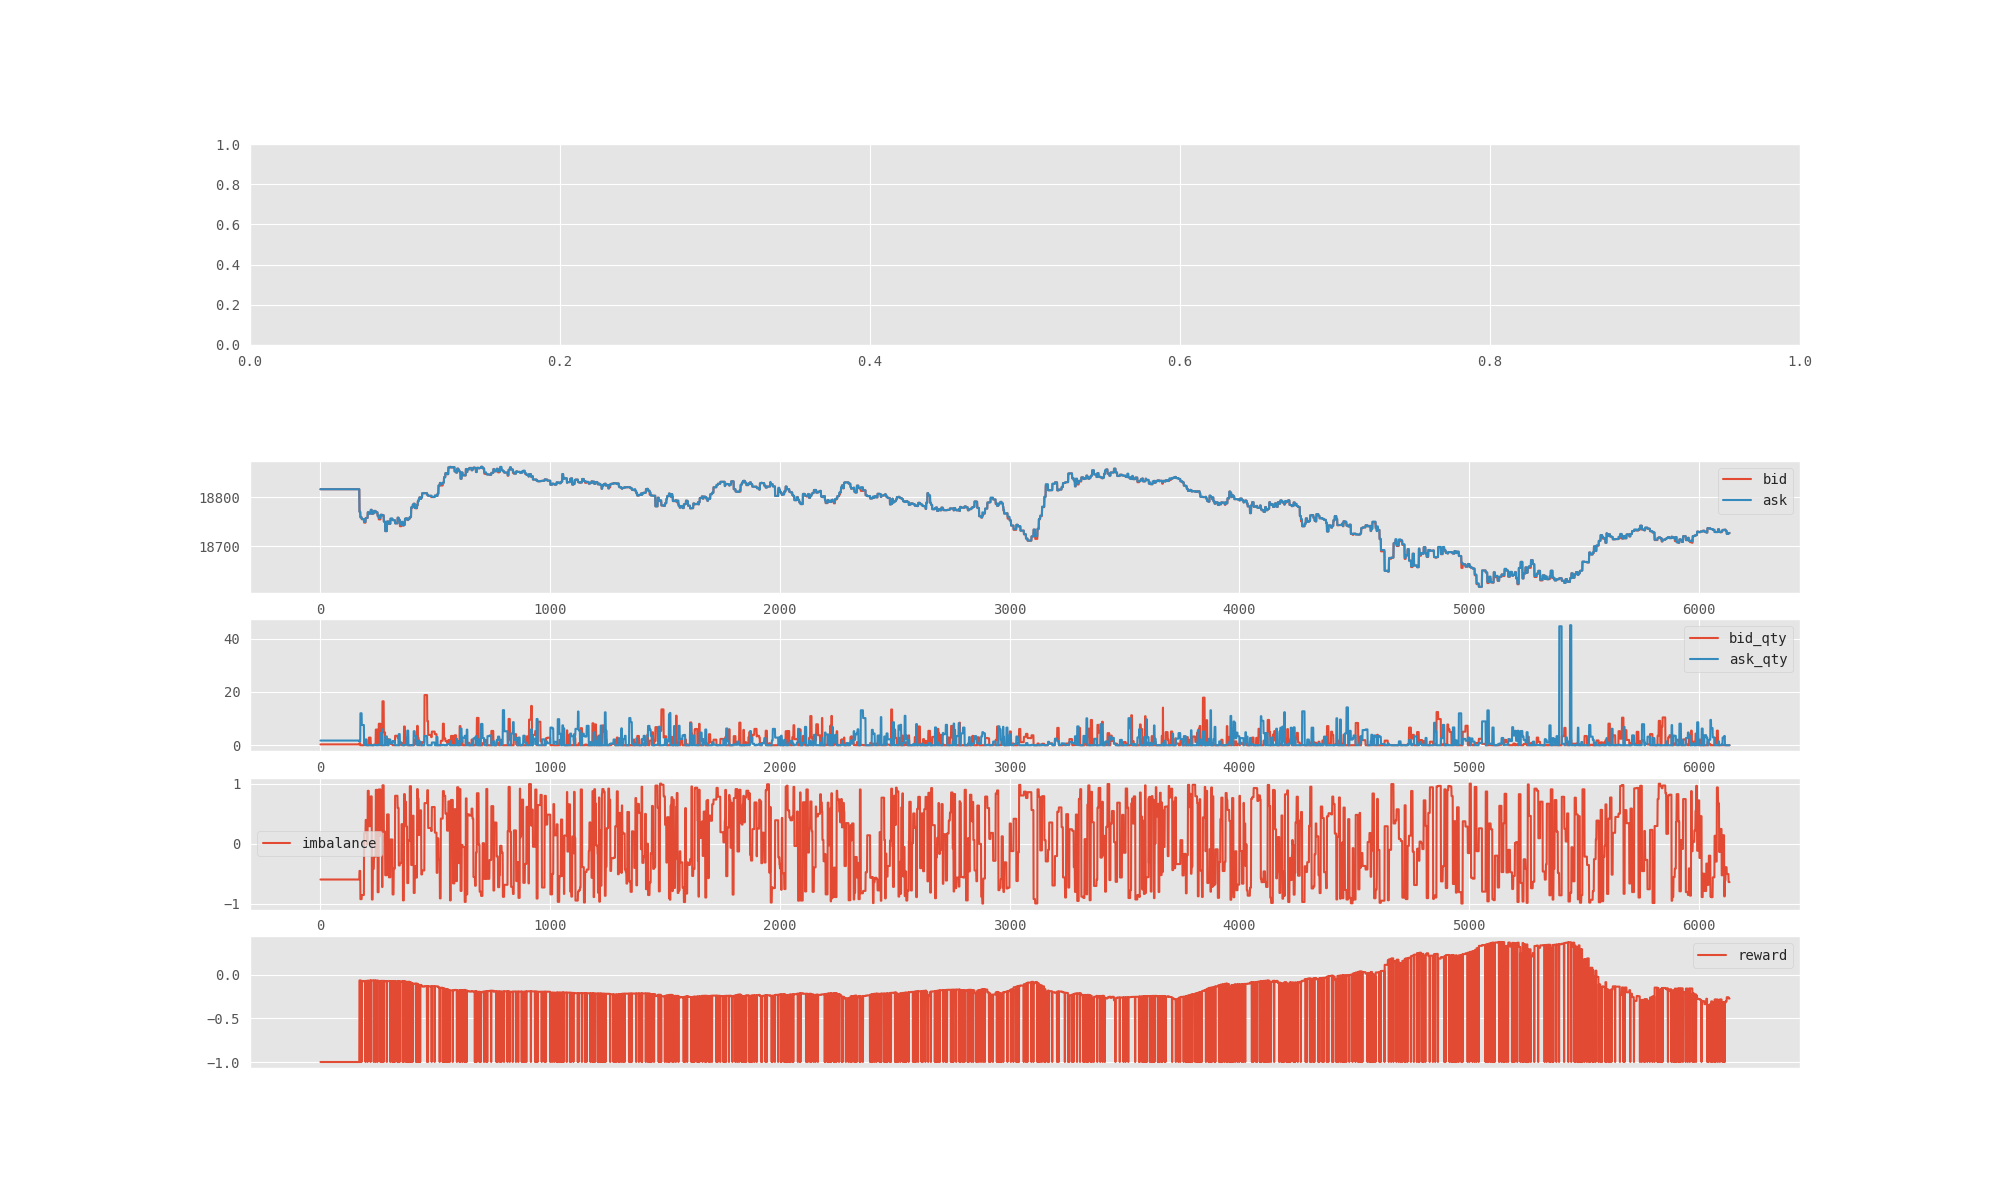

In [24]:
plot_4=algorithm.plot_params(raw_trade_pnl_df=backtest_result_train)

# Test

In [25]:
output_test = algorithm.test(
        instrument_pk=instrument_pk,
        start_date=start_date_test,
        end_date=end_date_test,
    )



testing on algorithm AvellanedaDQN_avellaneda_stoikov_dqn_0
launching AvellanedaDQN_avellaneda_stoikov_dqn_0
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
AvellanedaDQN_avellaneda_stoikov_dqn_0 finished with code 0
finished 1 backtests in 0 minutes
AvellanedaDQN_avellaneda_stoikov_dqn_0 with 5597 trades


In [26]:
name_output=algorithm_info
backtest_result_test=output_test[name_output]
backtest_result_test.tail()

,timestamp,date,verb,price,quantity,netPosition,avgOpenPrice,netInvestment,historicalRealizedPnl,historicalUnrealizedPnl,historicalTotalPnl,numberTrades,reward,skewPricePct,imbalance,riskAversion,ask,windowTick,bid_qty,ask_qty,bid
5592,1607443196098,2020-12-08T15:59:56.098,Buy,18816.095735,0.0001,0.000996,18818.738729,182.272385,-0.932643,-0.002633,-0.935276,5596,-0.933420,0.01,-0.412310,0.05,18816.10,8.0,1.762507,5.318870,18816.09
5593,1607443197105,2020-12-08T15:59:57.105,Sell,18813.496000,0.0001,0.000896,18818.738729,182.272385,-0.933167,-0.004696,-0.937864,5597,-0.933420,0.01,-0.412310,0.05,18816.10,8.0,1.762507,5.318870,18816.09
5594,1607443197251,2020-12-08T15:59:57.251,Buy,18813.497485,0.0001,0.000996,18818.212500,182.272385,-0.933167,-0.004699,-0.937866,5598,-0.933420,0.01,-0.412310,0.05,18816.10,8.0,1.762507,5.318870,18816.09
5595,1607443198994,2020-12-08T15:59:58.994,Buy,18811.004990,0.0001,0.001096,18817.554880,182.272385,-0.933167,-0.009086,-0.942253,5599,-1.000000,0.01,-0.412310,0.05,18816.10,8.0,1.762507,5.318870,18816.09
5596,1607443199994,2020-12-08T15:59:59.994,Sell,18809.265010,0.0001,0.000996,18817.554880,182.272385,-0.933996,-0.007609,-0.941606,5600,-0.940346,-0.01,-0.037449,0.05,18809.27,8.0,3.187671,0.253803,18809.26


plotting trade_results from 2020-12-08 15:00:07.807000 to 2020-12-08 16:59:59.994000


<IPython.core.display.Javascript object>


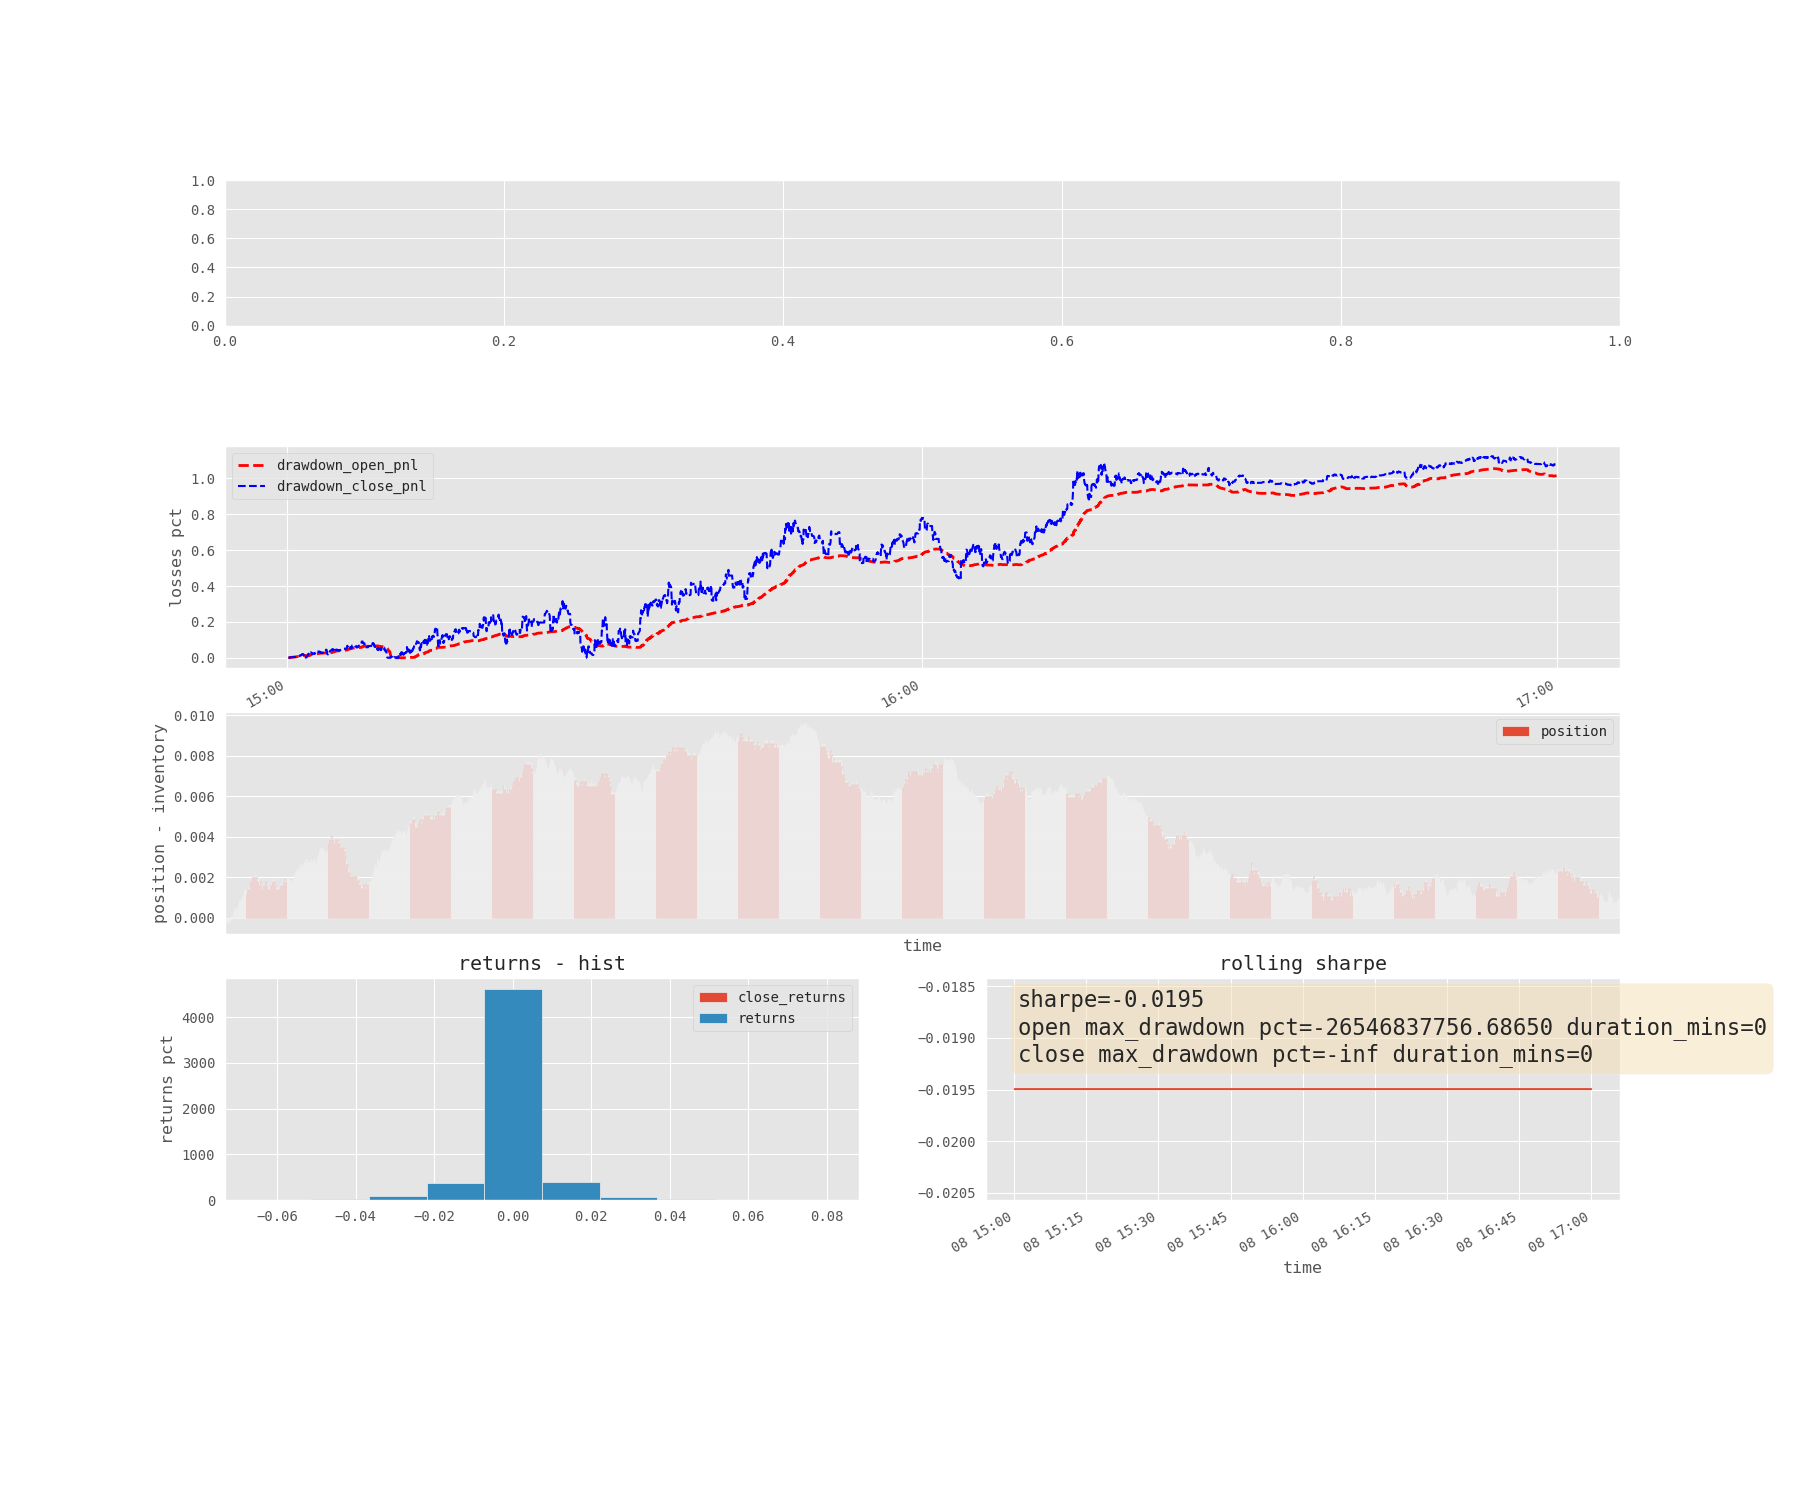

(<Figure size 1800x1500 with 4 Axes>,
                              timestamp  verb         price  quantity  \
 time                                                                   
 2020-12-08 15:00:07.807  1607436007807   Buy  18919.706000    0.0001   
 2020-12-08 15:00:08.426  1607436008426  Sell  18919.706000    0.0001   
 2020-12-08 15:00:09.625  1607436009625  Sell  18919.708000    0.0001   
 2020-12-08 15:00:11.625  1607436011625   Buy  18922.826000    0.0001   
 2020-12-08 15:00:11.773  1607436011773  Sell  18920.996000    0.0001   
 ...                                ...   ...           ...       ...   
 2020-12-08 16:59:56.098  1607443196098   Buy  18816.095735    0.0001   
 2020-12-08 16:59:57.105  1607443197105  Sell  18813.496000    0.0001   
 2020-12-08 16:59:57.251  1607443197251   Buy  18813.497485    0.0001   
 2020-12-08 16:59:58.994  1607443198994   Buy  18811.004990    0.0001   
 2020-12-08 16:59:59.994  1607443199994  Sell  18809.265010    0.0001   
 
           

In [27]:
plot_5=algorithm.plot_trade_results(raw_trade_pnl_df=backtest_result_test)

plotting params from 0 to 5596


<IPython.core.display.Javascript object>


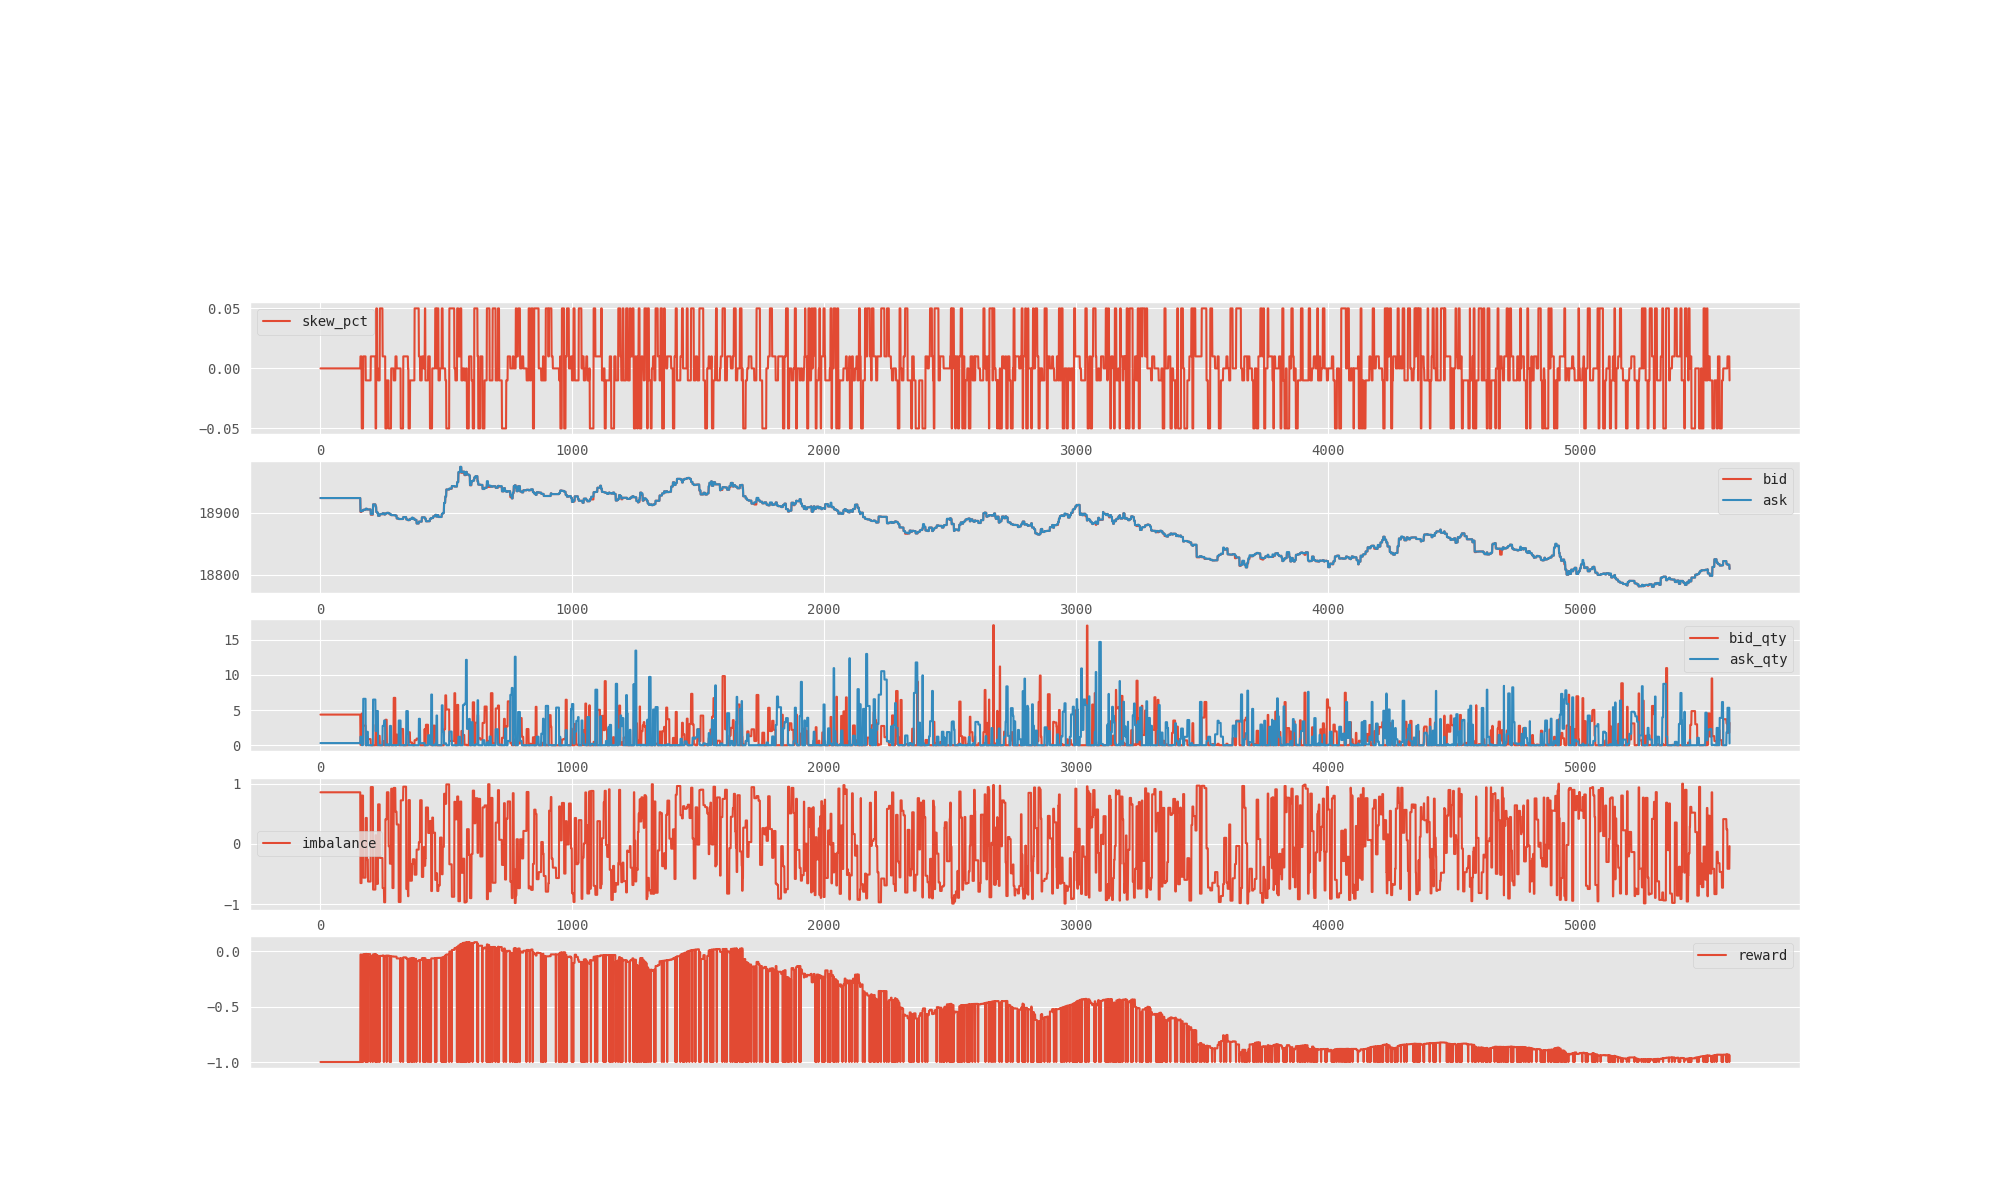

In [28]:
plot_6=algorithm.plot_params(raw_trade_pnl_df=backtest_result_test)

In [29]:
save_notebook_session(session_name)

notebook session file save as  AvellanedaDQNNotebook


In [30]:
if not DEBUG:
    file_output='%s_output.csv'%algorithm.algorithm_info
    backtest_result_test.to_csv(file_output)
    save_notebook_session(session_name)
    send_email(recipient='javifalces@gmail.com',subject='[%s]%s finished'%(datetime.datetime.today(),algorithm.algorithm_info),body='finished %s'%datetime.datetime.today(),file_append=[file_output])
    os.remove(file_output)

notebook session file save as  AvellanedaDQNNotebook
